In [48]:
import matplotlib.pyplot as plt 
from scipy.fftpack import fft
import numpy as np
import time

Text(0, 0.5, 'Амплитуда')

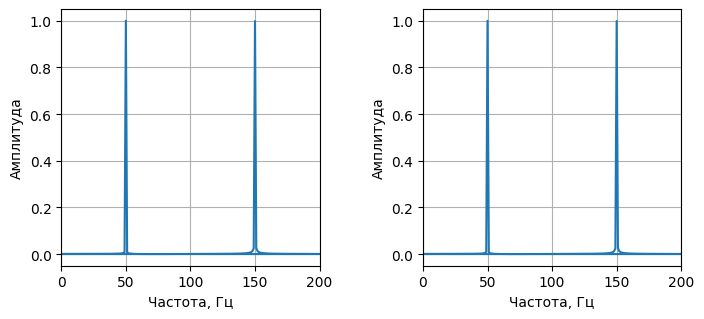

In [49]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N,1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)


N = 6000 # Количество отсчетов
fmax=400 # максимальная частота
T = 1.0/fmax #
f1=50 # частота сигнала в Гц
f2=150 # частота сигнала в Гц
x = np.linspace(0.0, 1.0, N)
y1 = np.cos(f1 * 2.0*np.pi*x) #
y2 = np.cos(f2 * 2.0*np.pi*x) #
y = y1 + y2
yf = DFT_slow(y)
xf = np.fft.fftfreq(len(x), d=(x[1]-x[0]))
yff = fft(y)
fig = plt.figure(figsize=(8,8)) # размер полотна
plt.subplots_adjust(wspace=0.4, hspace=0.4) # отступ между графиками
plt.subplot(221)
plt.plot(xf, 2.0/N * np.abs(yf))
plt.xlim(0,200)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.subplot(222)
plt.plot(xf, 2.0/N * np.abs(yff))
plt.xlim(0,200)
plt.grid()
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')




In [50]:
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

2.47 s ± 155 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
78.6 µs ± 5.55 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


c:\Users\honor\pythonTasks\myvenv\Lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


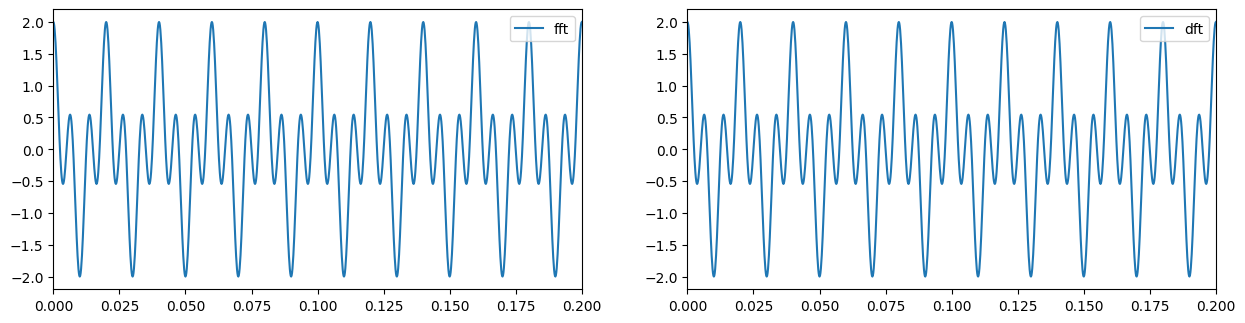

In [51]:
y1 = np.fft.ifft(yf)
y2 = np.fft.ifft(yff)
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.plot(x, y1, label="fft")
plt.xlim(0,0.2)
plt.legend()
plt.subplot(222)
plt.plot(x, y2, label="dft")
plt.xlim(0, 0.2)
plt.legend()
plt.show()

# Task2

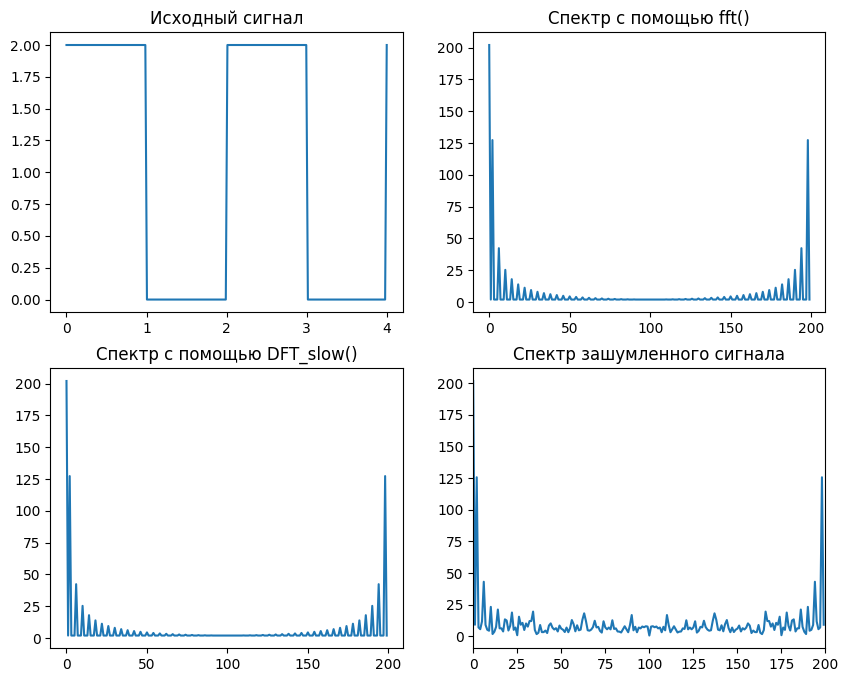

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Создаем исходный сигнал
t = np.linspace(0, 4, 200)
x = np.zeros_like(t)
x[t % 2 < 1] = 2

# Строим дискретный спектр с помощью fft()
X = np.fft.fft(x)

# Строим дискретный спектр с помощью DFT_slow()
def DFT_slow(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

X_slow = DFT_slow(x)

# Наложение шума на сигнал
noise = np.random.normal(0, 0.5, len(x))
x_noisy = x + noise

# Строим дискретный спектр зашумленного сигнала
X_noisy = np.fft.fft(x_noisy)

# Отображаем результаты
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
plt.xlim(0,200)
axs[0, 0].plot(t, x)
axs[0, 0].set_title('Исходный сигнал')
axs[0, 1].plot(np.abs(X))
axs[0, 1].set_title('Спектр с помощью fft()')
axs[1, 0].plot(np.abs(X_slow))
axs[1, 0].set_title('Спектр с помощью DFT_slow()')
axs[1, 1].plot(np.abs(X_noisy))
axs[1, 1].set_title('Спектр зашумленного сигнала')

plt.show()

#            Task3

In [69]:
def FFT(x):
    n = len(x)
    if n == 1:
        return x
    else:
        even = FFT(x[::2])
        odd = FFT(x[1::2])
        factor = np.exp(-2j * np.pi / n * np.arange(n))
        return np.concatenate([even + factor[:n // 2] * odd, even + factor[n // 2:] * odd])

In [87]:
#Объявление констант
f = 50
w = 2*np.pi*f
t0 = 0
t1 = 4*np.pi
num = np.power(2, 14)
t = np.linspace(t0, t1, num)
y = np.cos(w*t)

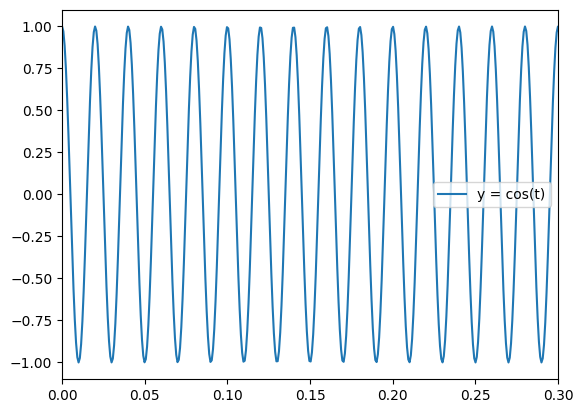

In [88]:
#График y = cos(t)
plt.plot(t, y, label = "y = cos(t)")
plt.legend()
plt.xlim(0, 0.3)
plt.show()

In [89]:
#Сравнение времени вычислений БДПФ и numpy fft
y_my_fft = FFT(y)

y_fft = np.fft.fft(y)

%timeit FFT(t)
%timeit np.fft.fft(t)

305 ms ± 13.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
494 µs ± 11.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


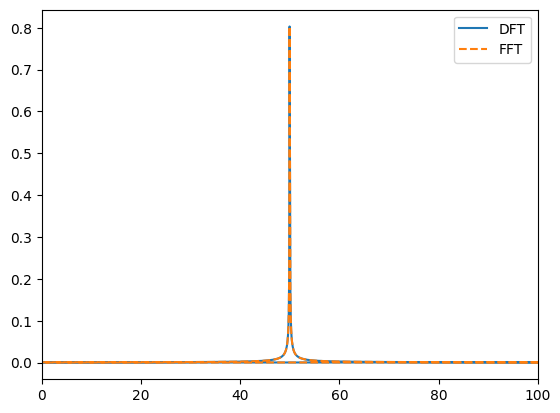

In [90]:
#Сравнение спектров
freq_cos = np.fft.fftfreq(len(t), d=(t[1]-t[0]))
plt.plot(freq_cos, np.abs(y_my_fft) / num * 2, label = "DFT")
plt.plot(freq_cos, np.abs(y_fft) / num * 2, linestyle='dashed', label = "FFT")
plt.legend()
plt.xlim(0, 100)
plt.show()

## Другая реализация

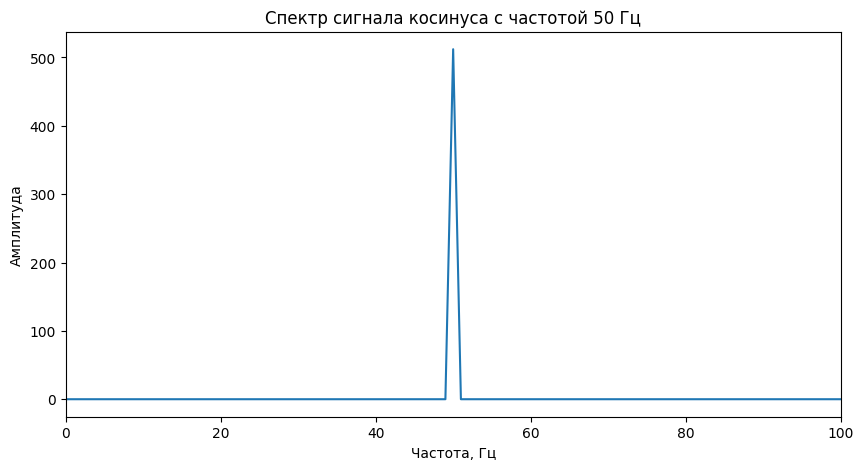

12.4 ms ± 2.19 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
14.5 µs ± 525 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [91]:
def FFT(x):
    N = len(x)
    if N <= 1:
        return x
    even = FFT(x[0::2])
    odd = FFT(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + \
           [even[k] - T[k] for k in range(N // 2)]

# Проверка работы функции на сигнале косинуса с частотой 50 Гц
fs = 1024 # частота дискретизации
t = np.arange(0, 1, 1/fs)
x = np.cos(2*np.pi*50*t)
X = FFT(x)
freq = np.arange(0, fs, fs/len(X))

plt.figure(figsize=(10,5))
plt.plot(freq, np.abs(X))
plt.xlim(0,100)
plt.title('Спектр сигнала косинуса с частотой 50 Гц')
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.show()

# Сравнение времени выполнения с встроенной функцией fft()
x = np.random.random(1024)
%timeit FFT(x)
%timeit np.fft.fft(x)